# Publishing blog posts directly from Notebooks

## Goals:  
- Publish your first blog post.  
- Create a full, proper python library for the custom Sentiment Analysis pipeline from last time.   

# Introduction


Here we take a closer look at the `nbdev` library. `nbdev` is a powerful tool based on two key ideas:  
- Literate programming. 
- Exploratory programming.  


In Literate Programming, descriptions (documentation) are woven directly into a project's source code.  
This is opposite of how most codebases are set up, where documentation exists as a separate set of files.  

How is this different from parsing source code and comments into documentation? In Literate Programming the code, tests, and documentation are all first-class citizens. And with `nbdev`, the Notebook is the single source of truth for all of these. Think about what this truly means, and just how much overhead work it removes.   

Instead of having to independently manage code, docs, and tests, everything can be done in Notebooks. If the notebook runs, you know your code will run. And you can directly document and test your code in the notebook as you develop.    

Exploratory programming is, as the name suggests, an open-ended approach to coding when exploring unknown domains or areas. Folks often use it at the start of a project, when the requirements or scope are not yet flushed out.  

Try things out, figure out how they work, what they do. Poke around. Explore. Follow that curiosity. Have fun! Can always restart the Notebook, no fear around trying things - very little to no downside.  

`nbdev` combines these two ideas. We can then mix and match them in different doses as needed.  

This notebook will turn our previous, first runs into a proper python library.  
It will have documentation and tests directly in the notebook.  


# Publishing blogs from a Notebook  

## Steps:  
1. Create a new nbdev project.  
2. Set up the minimum requirements for a blog.  
3. Publish it to Github pages (free, easy hosting). 

> Reference: [blogging with nbdev.](https://nbdev.fast.ai/tutorials/blogging.html)

`nbdev` leverages an amazing tool called [Quarto](https://quarto.org/) for blogging. 

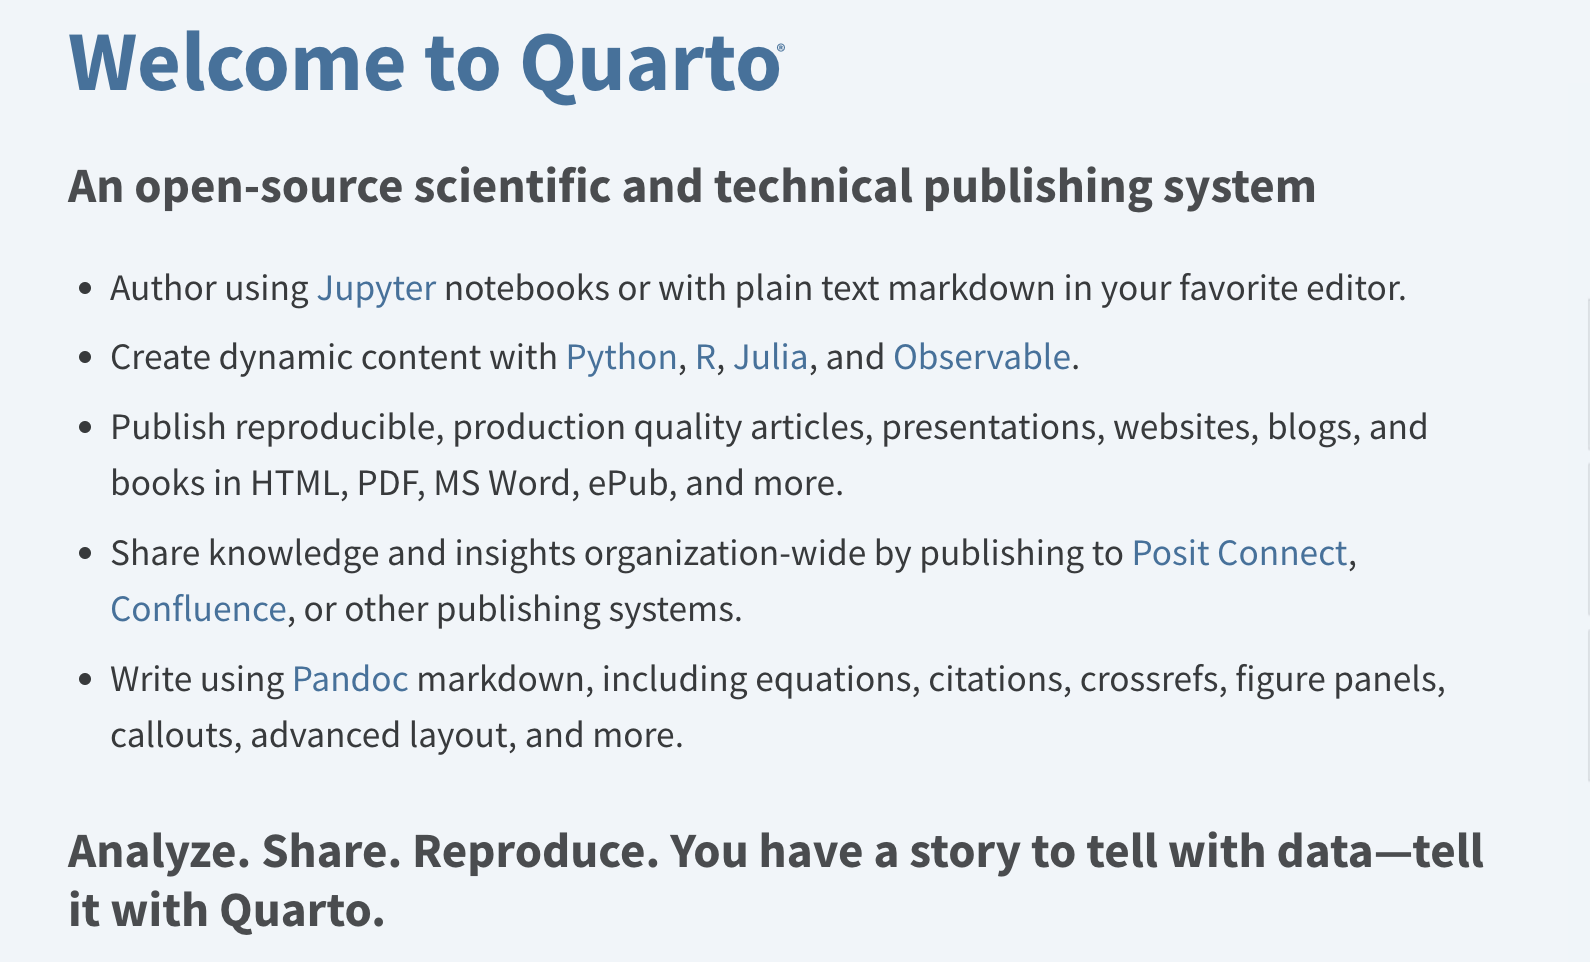

> Note: The following is a stripped down and simplified version of the [official nbdev tutorial.](https://nbdev.fast.ai/tutorials/tutorial.html#installation)

First, activate the virtual environment:

```bash
mamba activate llm_base
```

Then run the following to install Quarto. Note you will need administrator privileges:  

```bash
nbdev_install_quarto
```

At this point you may have to refresh your cell to find the `quarto` commands. Go ahead and open a new terminal window and you should be able to see Quarto:

```bash
which quarto # point somewhere like /Applications/quarto/bin/quarto
```

Quarto has a super-charged version of Markdown (`.qmd`). You can write all your blogposts, including those with code snippets, directly in Markdown if you prefer. To make sure that Jupyter notebooks can render this special Markdown flavor, install the following library:  

```bash
pip install jupyterlab-quarto
```

If this command fails, or you want to stick with Notebooks for now, you can skip this part.  

## Creating a fresh repo for our blog

`nbdev` works on top of a Git repo. Our first step then is creating a fresh repo. Github has a handy link to take us straight to the page. The main thing to remember is that we need a completely empty repo: no `.gitignore` or `README.md`.  

> [Create a new Github repo.](https://github.com/new)

I named my repo `sample_blog`, but the name can be anything! You're also not married to this name, we can always create a new repo with a better name, or even have many blogs in parallel. 

The next step is to clone this repo to our computer. Replace the link with the one to yours as needed: 

```bash
git clone https://github.com/enzokro/sample_blog.git # <-- your repo here instead
```

Then we can move inside of the repo, and instantiate `nbdev`. The `nbdev_new` command will bring up a prompt asking for some basic info about our project.

```bash
cd sample_blog/
nbdev_new
```

Go ahead and fill out the prompts. All the options and configs for your repo can be found in the `settings.ini` file. This is the file where `nbdev`` looks for any info it needs when running its commands.

Now we can commit everything that `nbdev_new` created, and we will officially have a fresh `nbdev` project!

```bash
git add .
git commit -m'Initial commit'
git push
```

## Adding Quarto to the mix

We can modify our repo into a Quarto blog with a few easy steps. Specifically, we will add a few files and change some settings on the Github GUI so we can deploy the blog. 

Typically, the `nbs/` (notebooks) folder in an `nbdev` project has the Notebooks that are turned into test, documentations, and source code. In this case, `nbs/` will be where our blog and its content live. First let's look at what the new `nbs/` folder will look like when we're done and ready with its first post.

**Minimal blog folder structure**:
```
sample_blog
└───nbs/
│   │   _quarto.yml
│   │   index.ipynb
│   └───blog/
│       │   index.qmd
│       └───posts/
│           └───2023-09-24-first-post/     
│               │   index.ipynb
```

First, we have to setup Github pages that will automatically build and host our site for free. Below you can see the needed settings in `sample_blog`'s Github page:

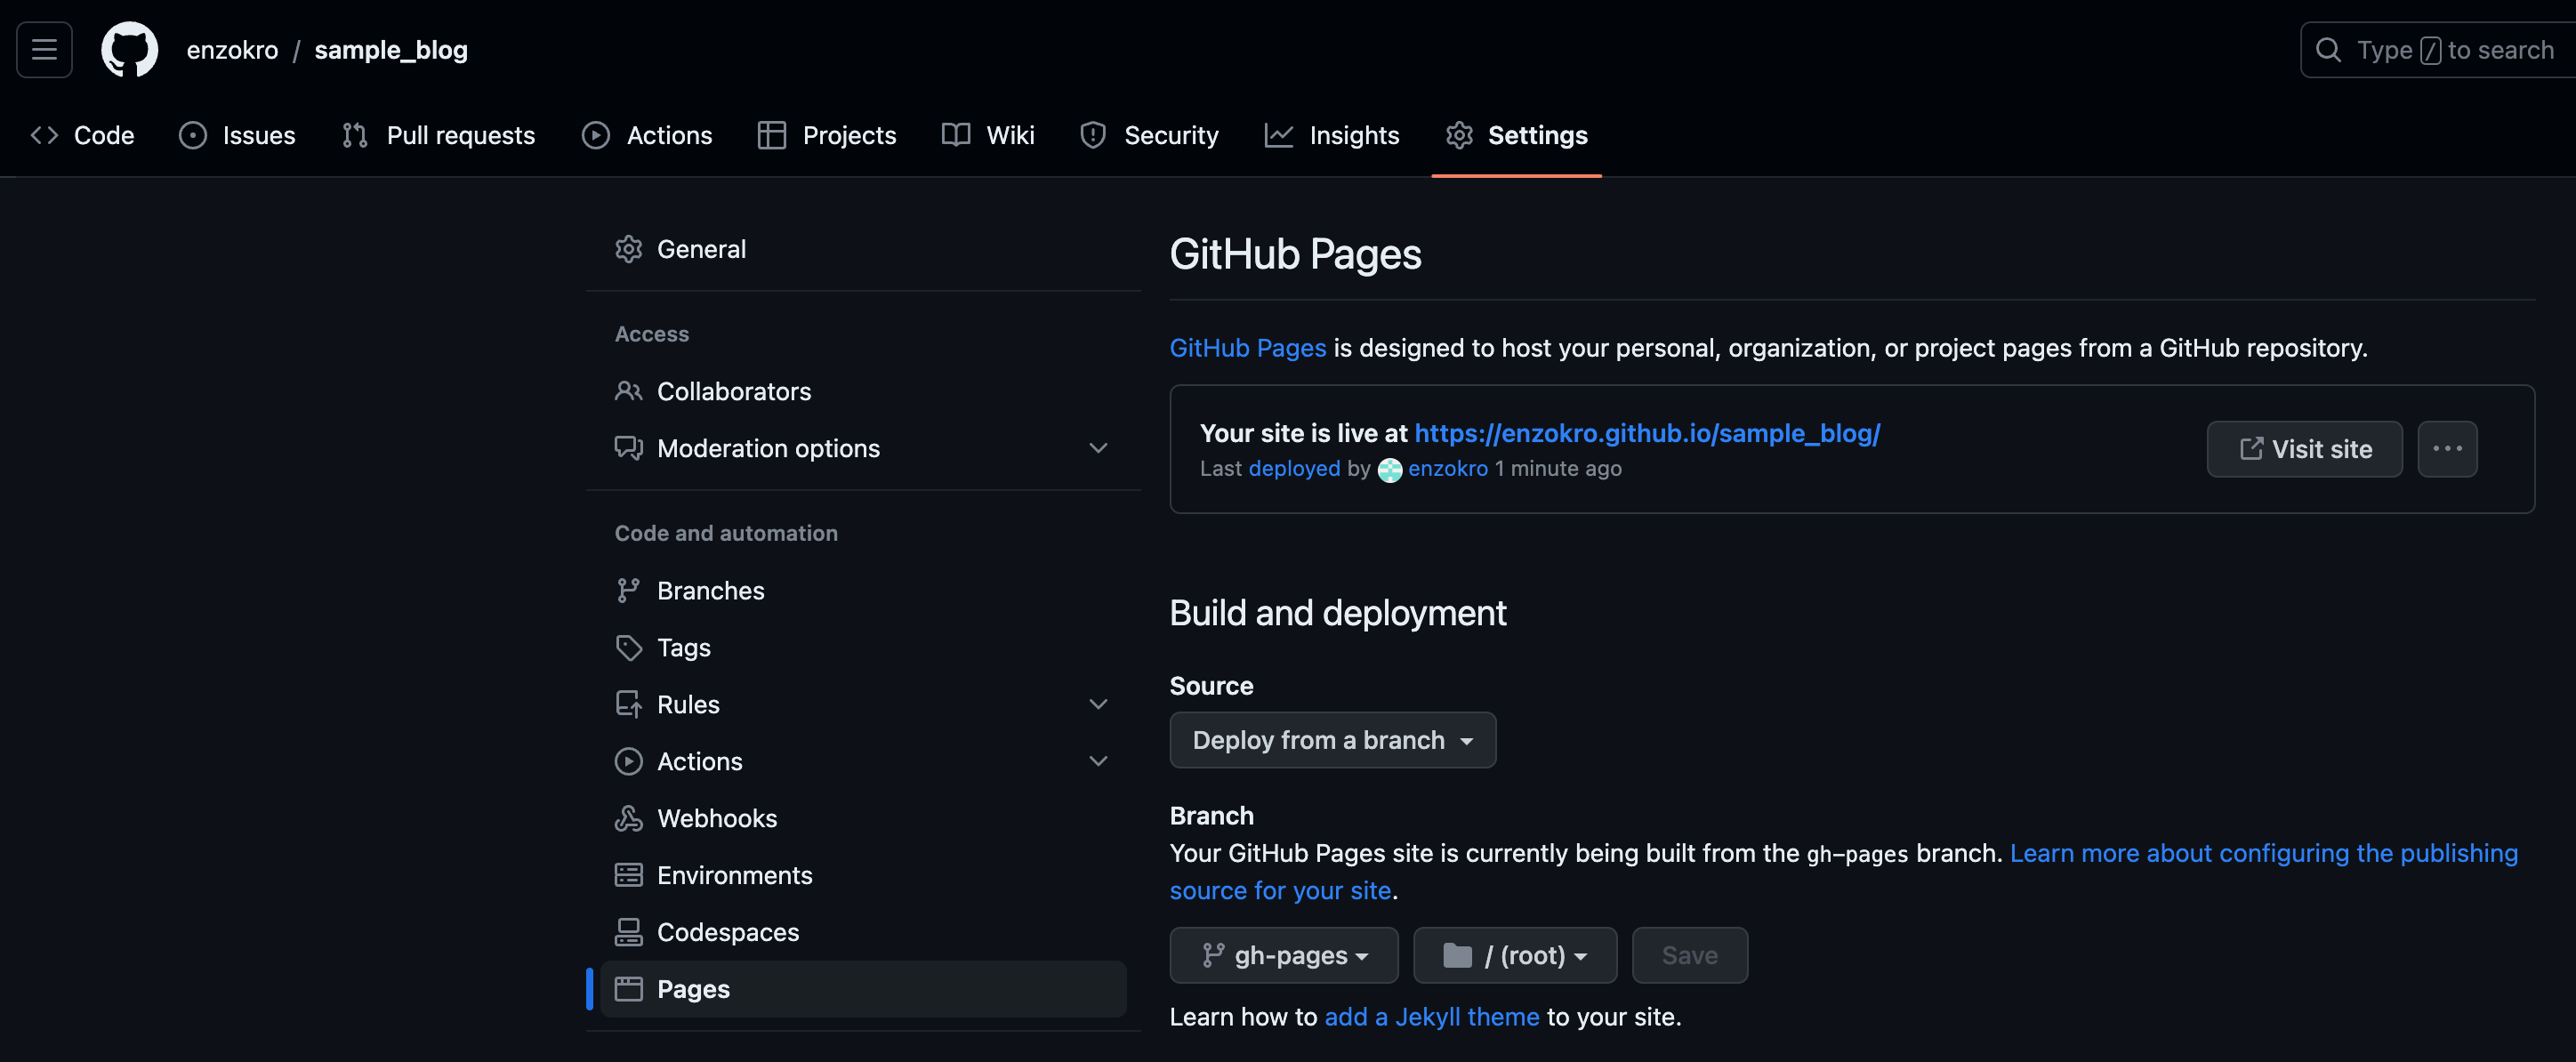

> Live link to our [brand new blog](https://enzokro.github.io/sample_blog/).

# Creating a full, proper python library with `nbdev`

`nbdev` has a set of magic commands that help convert our Notebooks into fully fledged python modules (or packages).  

We use most of these magic commands at the start of a Jupyter code cell. These commands are called `directives`, because they tell nbdev what to do as it's stepping through and parsing a Notebook.  

For example, the following directive gives our python file its main name of `simple_pipeline`: 

In [2]:
#| default_exp lesson2.simple_pipeline

> Note: sometimes nbdev will complain if this cell is not the first one in a notebook.  

Once we've named our soon-to-be python file, the `#| export` directive will extract any python code we tell it to.

In [3]:
#| export  
# cell where we import the pieces of our pipeline.
from transformers import AutoConfig
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

/Users/cck/mambaforge/envs/llm_base/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


> A small annoyance: `import` statements have to be in their own code cell. We can pair them with calls to `print()`, for example.

Next, we took the code from the previous notebook (`01_first_run.ipynb`) and refactored it into a class. 

In [4]:
#| export  

class SentimentPipeline:
    def __init__(self, model_name):
        """
        Sentiment Analysis pipeline.
        """
        self.model_name = model_name
        self.config = AutoConfig.from_pretrained(self.model_name)
        self.tokenizer = AutoTokenizer.from_pretrained(self.model_name)
        self.model = AutoModelForSequenceClassification.from_pretrained(self.model_name)


    def preprocess(self, text: str):
        """
        Sends `text` through the LLM's tokenizer.  
        The tokenizers turns words and characters into special inputs for the LLM.
        """
        tokenized_inputs = self.tokenizer(text, return_tensors='pt')
        return tokenized_inputs
    

    def forward(self, text: str):
        """
        First we preprocess the `text` into tokens.
        Then we send the `token_inputs` to the model.
        """
        token_inputs = self.preprocess(text)
        outputs = self.model(**token_inputs)
        return outputs
    

    def process_outputs(self, outs):
        """
        Here is where HuggingFace does the most for us via `pipeline`.  
        """
        # grab the raw "scores" that from the model for Positive and Negative labels
        logits = outs.logits

        # find the strongest label score, aka the model's decision
        pred_idx = logits.argmax(1).item()

        # use the `config` object to find the class label
        pred_label = self.config.id2label[pred_idx]  

        # calculate the human-readable number for the score
        pred_score = logits.softmax(-1)[:, pred_idx].item()

        return {
            'label': pred_label,
            'score': pred_score, 
        }
    
    def __call__(self, text: str):
        model_outs = self.forward(text)
        preds = self.process_outputs(model_outs)
        return preds
    
    def __repr__(self):
        return f"SentimentAnalysis_{self.model_name}"



Let's first make sure we can properly use this `SentimentPipeline`, since that's one of the main benefits of Notebook coding in the first place! Note that since we didn't put an "export" directive in this cell, it won't be part of the python file either. You can think of this as a test cell!

In [5]:
# testing our pipeline

model_name = 'distilbert-base-uncased-finetuned-sst-2-english'

classifier = SentimentPipeline(model_name)

In [6]:
classifier("We are very happy to show you the 🤗 Transformers library.")

{'label': 'POSITIVE', 'score': 0.9997795224189758}